In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('linear.csv')
df

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


In [3]:
import numpy as np

data = np.array(df)
data

array([[ 8.76774741,  3.99510798,  0.        ],
       [ 5.93875021,  5.38756183,  0.        ],
       [ 8.60529063, -2.65203163,  1.        ],
       ...,
       [ 7.32466035,  6.60700373,  0.        ],
       [ 6.88956231,  4.77559685,  0.        ],
       [ 9.43969427, -2.02575863,  1.        ]])

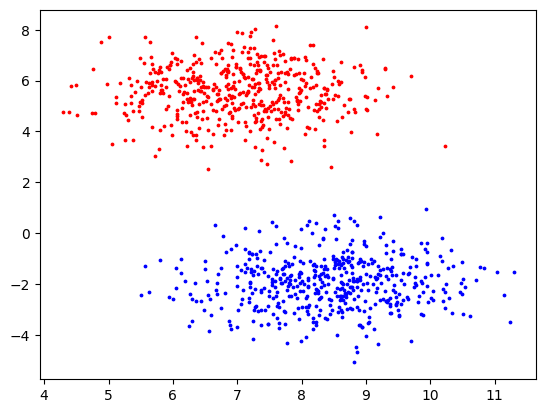

In [4]:
x = data[:, [0, 1]]
y = data[:, -1].astype(int)

plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], s=3, c='r')
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], s=3, c='b')
plt.show()

In [5]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for Xi, target in zip(X, y):
                update = self.eta * (target - self.predict(Xi))
                self.w_[1:] += update * Xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

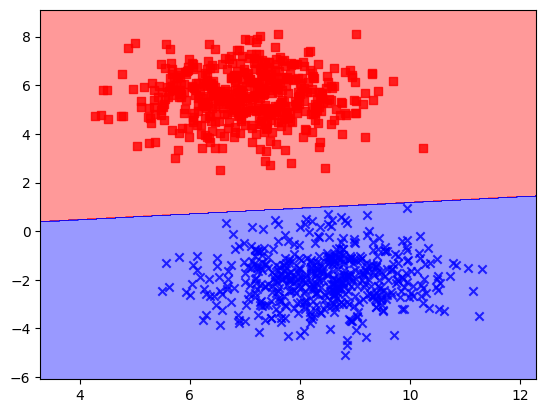

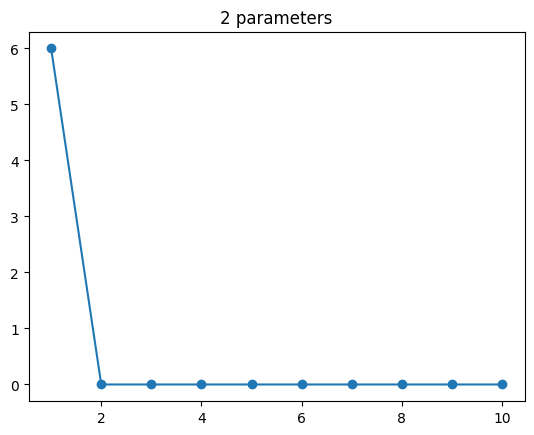

In [9]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(x, y)
plot_decision_regions(x, y, classifier=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.title(f'{x.shape[1]} parameters')
plt.show()

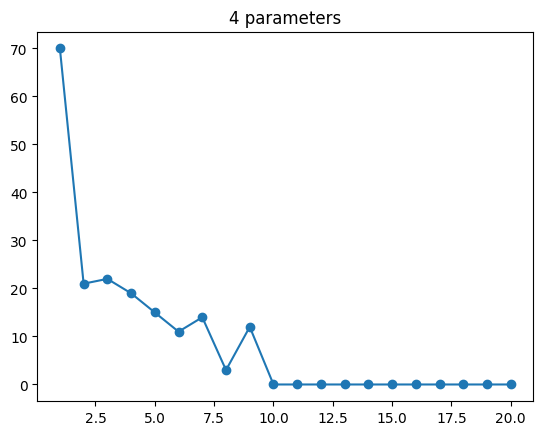

In [10]:
X2 = np.copy(x)

X2 = np.column_stack((X2, np.power(X2[:, 0], 2)))
X2 = np.column_stack((X2, np.power(X2[:, 1], 2)))

ppn2 = Perceptron(eta=0.01, n_iter=20)
ppn2.fit(X2, y)

plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')
plt.title(f'{X2.shape[1]} parameters')
plt.show()
